<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv")

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


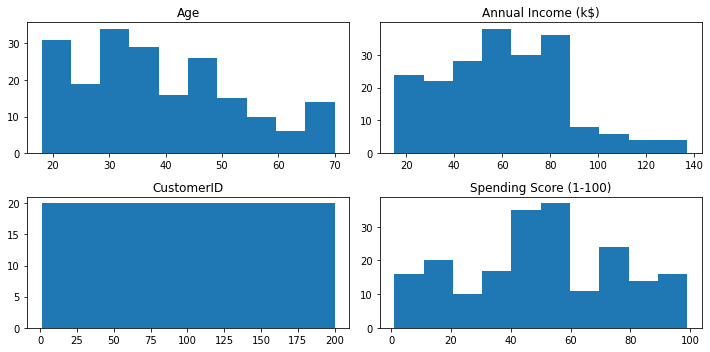

In [40]:
df.hist(figsize=(10,5),grid=False)
plt.tight_layout()
plt.show()

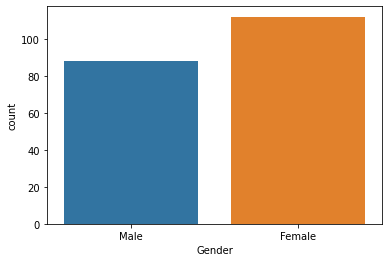

In [41]:
sns.countplot(x="Gender", data=df)
plt.show()

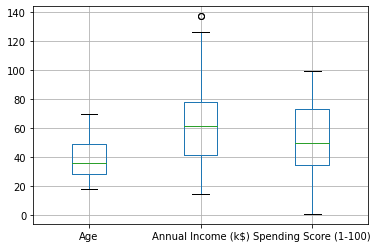

In [42]:
df[["Age","Annual Income (k$)","Spending Score (1-100)"	]].boxplot()
plt.show()

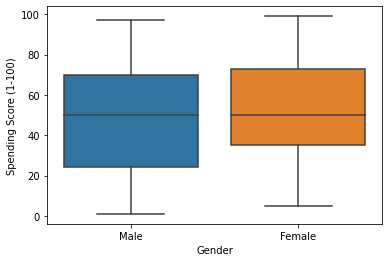

In [43]:
sns.boxplot(x=df['Gender'],y=df['Spending Score (1-100)'])
plt.show()

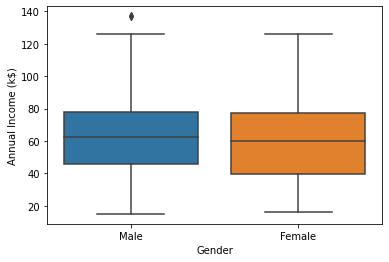

In [44]:
sns.boxplot(x=df['Gender'],y=df['Annual Income (k$)'])
plt.show()

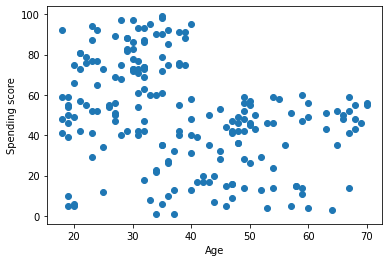

In [45]:
plt.scatter(x=df['Age'],y=df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending score')

plt.show()

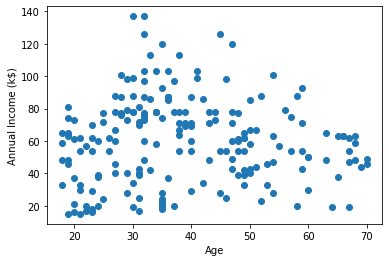

In [46]:
plt.scatter(x=df['Age'],y=df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

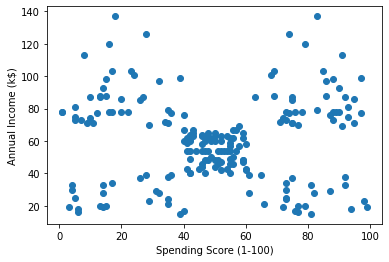

In [47]:
plt.scatter(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [0]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=="Female" else 1)
# labelled gender 

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [51]:
# removing customer id 
data = df.iloc[:,1:5]
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [59]:
X,y = train_test_split(data, test_size=.2)
X.shape

(160, 4)

In [0]:
clusters = 4
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(X)

In [61]:
# Checking within-cluster sum of squares
kmeans.inertia_

83445.65920166578

In [62]:
kmeans.cluster_centers_


array([[ 0.39473684, 45.60526316, 48.18421053, 41.57894737],
       [ 0.45454545, 32.90909091, 86.84848485, 81.27272727],
       [ 0.54166667, 24.41666667, 30.41666667, 73.        ],
       [ 0.48148148, 40.48148148, 85.92592593, 20.51851852]])

In [64]:
# distance from each centroid

kmeans.transform(y)

array([[ 54.03455727,  21.22698613,  45.0061917 ,  72.50234375],
       [ 29.95692892,  62.27998925,  16.1881837 ,  70.8835576 ],
       [ 11.63464475,  48.66935537,  46.31026479,  38.98714219],
       [ 24.23887071,  53.36503879,  59.87465205,  38.08709606],
       [ 70.58736066,  16.86784913,  74.47689099,  66.85582219],
       [ 64.3550735 ,  11.17803993,  60.80343158,  71.6317553 ],
       [ 59.02583476,  13.15790237,  50.27067361,  70.24610861],
       [ 23.3665688 ,  55.2833755 ,  39.03277202,  61.19335655],
       [ 50.48706672,  50.47570764,  79.20210829,  16.3343831 ],
       [ 35.19414889,  91.8357069 ,  66.04776523,  59.84050589],
       [ 22.87602078,  74.54778883,  56.11423431,  55.74941485],
       [ 28.2628026 ,  51.93623801,  55.14351541,  51.68634963],
       [ 44.62471242,  68.82021   ,  12.54554204,  81.87613181],
       [ 24.45289156,  35.10775751,  44.68378481,  44.62640222],
       [ 28.87444163,  84.6984496 ,  52.46005425,  64.53334651],
       [ 13.08058869,  45

Finding the optimal number of clusters in kmeans. One might be thinking that the model with lower within-cluster sum-of-squares score will be the best to decide how many cluster to pick to club the similar information together but this technique has some flaws and one of them is that as you increase the number of cluster the within-cluster-sum-of-squares score decrease. Obviously more the number of clusters, the closer each instance will be to its closest centroid. So a more precise approach to select the number of cluster is silhouette score which is the mean silhouette cofficient) over all the instances.

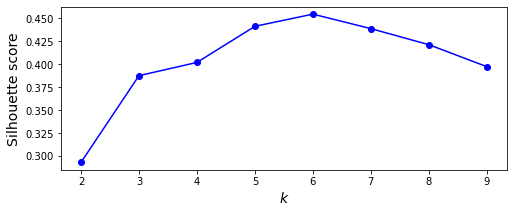

In [65]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [0]:
# we can see that k =6 gives more score hence using it
clusters = 6
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(X)

In [68]:
kmeans.inertia_


46797.48633326245

In [69]:
kmeans.cluster_centers_


array([[ 0.34285714, 26.94285714, 56.74285714, 49.08571429],
       [ 0.46875   , 32.53125   , 84.78125   , 81.5625    ],
       [ 0.41176471, 24.23529412, 27.        , 80.64705882],
       [ 0.375     , 42.6875    , 25.1875    , 20.0625    ],
       [ 0.58064516, 41.80645161, 89.09677419, 16.19354839],
       [ 0.48275862, 55.31034483, 52.31034483, 49.27586207]])

Agglomerative Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


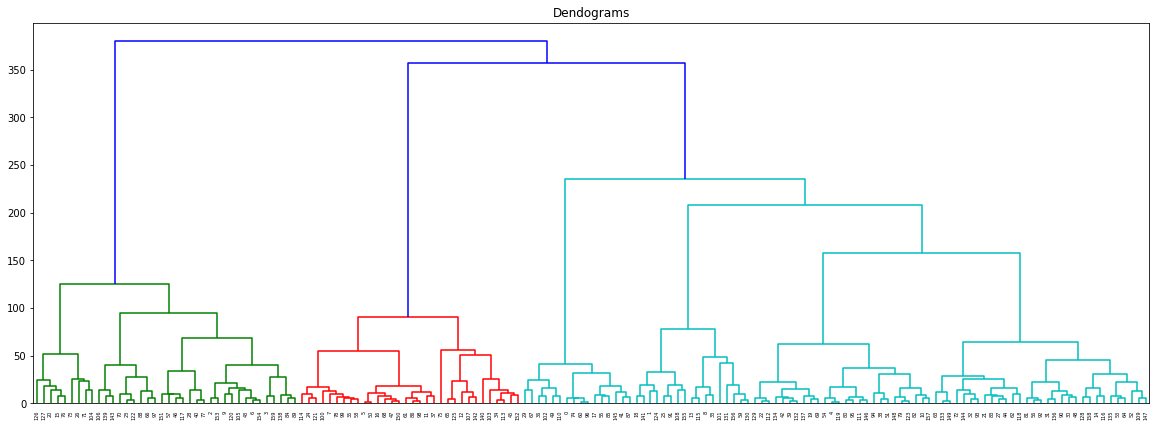

In [72]:
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendograms")
plt.show()

from dendogram it can be seen that 6 clusters can give good o/p for our model

In [0]:
agglo_clus = AgglomerativeClustering(n_clusters=6, affinity="euclidean",linkage="ward")

In [77]:
agglo_clus.fit(X)
labels = agglo_clus.labels_
labels[:10]

array([3, 1, 0, 0, 5, 2, 0, 2, 1, 0])

In [79]:
agglo_clus.fit_predict(y)

array([0, 2, 1, 5, 0, 0, 0, 5, 4, 3, 5, 5, 2, 1, 3, 1, 1, 5, 1, 0, 4, 5,
       0, 5, 5, 2, 1, 2, 3, 3, 1, 2, 4, 3, 5, 0, 1, 5, 1, 1])